CUSTOMER CHURN PREDICTION USING DECISION TREE

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv("customer_churn_dataset.csv")

df = df.dropna()
le = LabelEncoder()

In [3]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [5]:
print(df.columns)

Index(['tenure_months', 'monthly_usage_hours', 'has_multiple_devices',
       'customer_support_calls', 'payment_failures', 'is_premium_plan',
       'churn'],
      dtype='object')


In [6]:
X = df.drop("churn", axis=1)
y = df["churn"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [10]:
y_pred = model.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 Accuracy: 0.9819

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9799
           1       0.63      0.24      0.35       201

    accuracy                           0.98     10000
   macro avg       0.81      0.62      0.67     10000
weighted avg       0.98      0.98      0.98     10000


🔹 Confusion Matrix:
 [[9770   29]
 [ 152   49]]


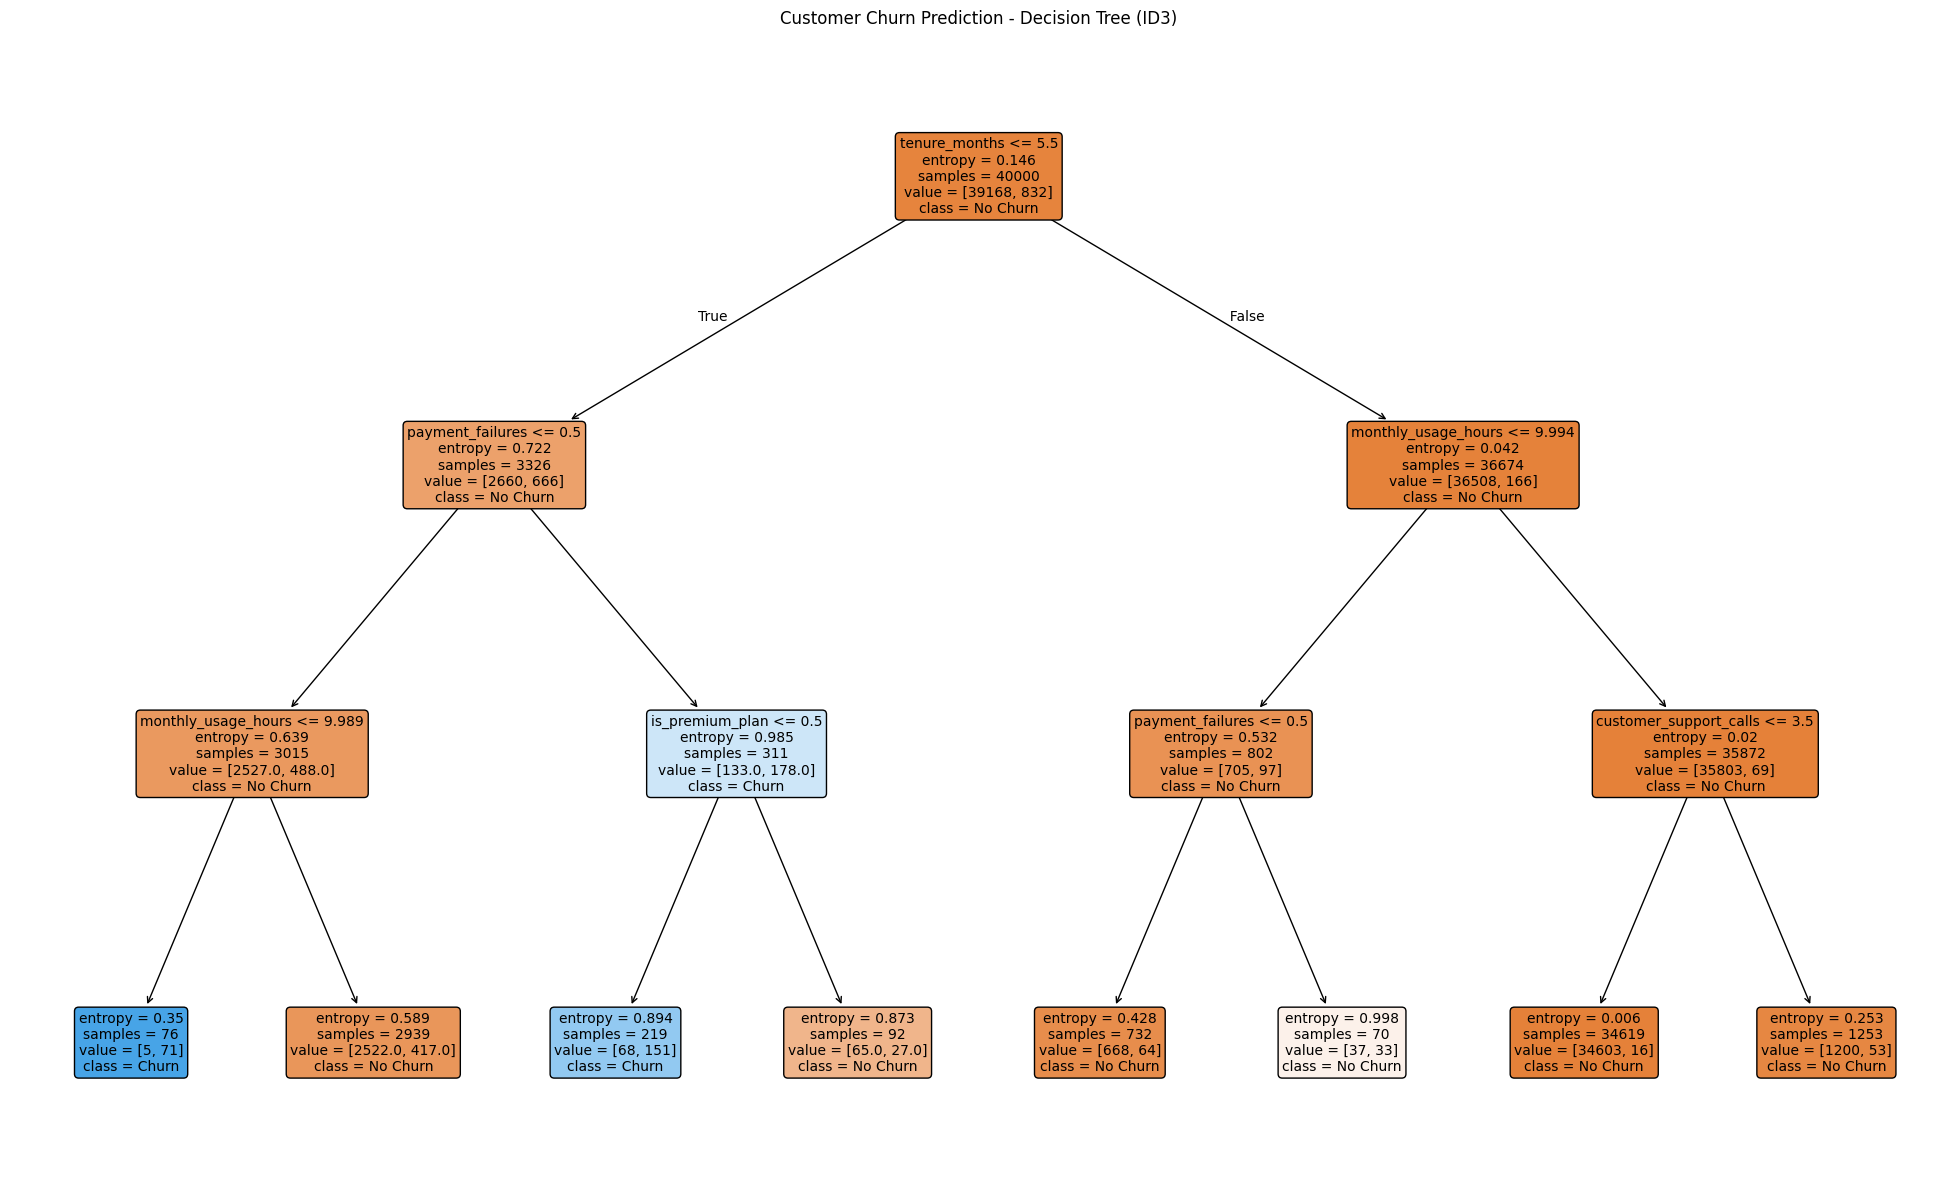

In [11]:
plt.figure(figsize=(25, 15))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Customer Churn Prediction - Decision Tree (ID3)")
plt.show()